In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir(r"C:\Notes\ds_project_portfolio\credit-card-default-prediction")

In [2]:
path=r"data\UCI_Credit_Card.csv"
df = pd.read_csv(path,index_col='ID')

In [3]:
df.shape

(30000, 24)

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Features**
* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   30000 no

In [6]:
df.duplicated().sum()

35

In [7]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

# EDA

In [8]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [9]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'
                    , 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
ordinal_categorical_features = ['EDUCATION']
categorical_features = ['MARRIAGE', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target_feature = ['default.payment.next.month']

In [10]:
for i in categorical_features + ordinal_categorical_features:
    print(df[i].value_counts())
    print('--'*50)

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
SEX
2    18112
1    11888
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3

categorical features preprocessing:

1. MARRIAGE: Marital status (1=married, 2=single, 3=others) --> Imputing marriage values 0 to 3
2. PAY_0-PAY_6: 
- values less than 0 --> credit card bill paid 
- 0 --> Use of revolving credit
- values greater than 0 --> credit card bill payment delay
3. EDUCATION: categories 0,4,5,6 --> 4

In [11]:
df[numeric_features].describe(percentiles=[0.01,0.025,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.975,0.99])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1%,10000.000000,22.000000,-81.000000,-200.000000,-2.000000e+02,-212.020000,-232.010000,-331.030000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
2.5%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
5%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
10%,30000.000000,25.000000,278.900000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000


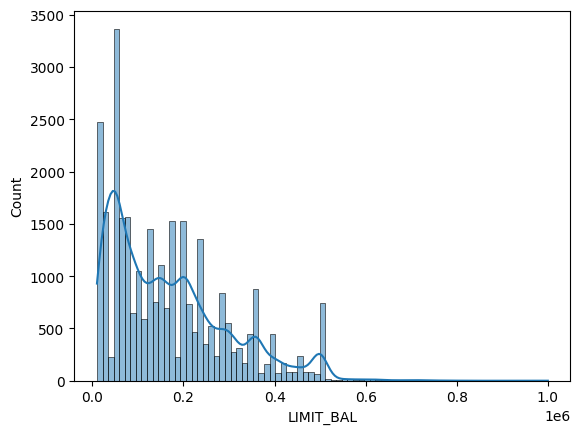

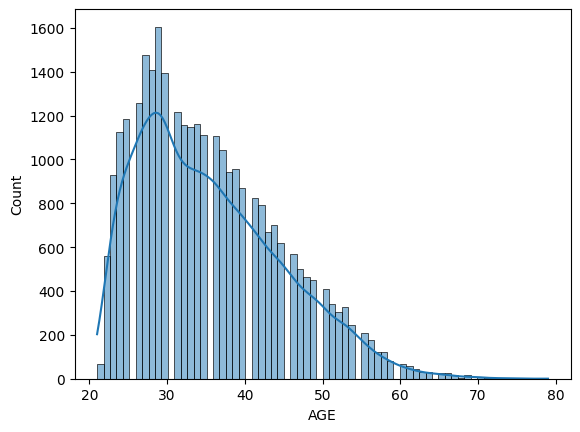

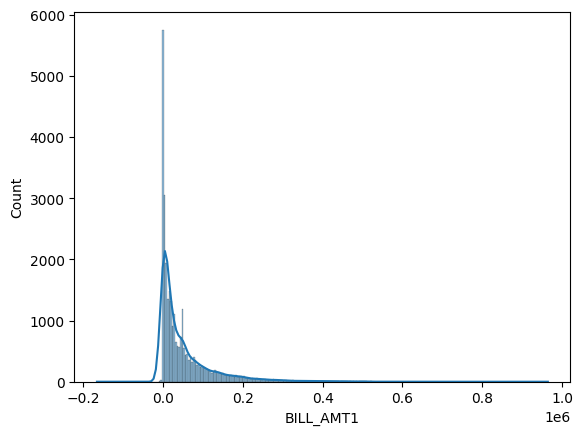

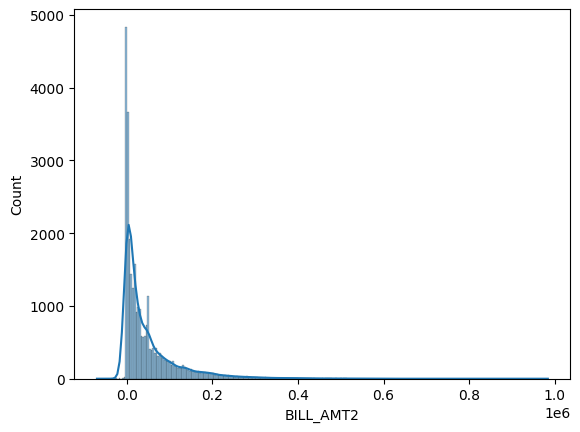

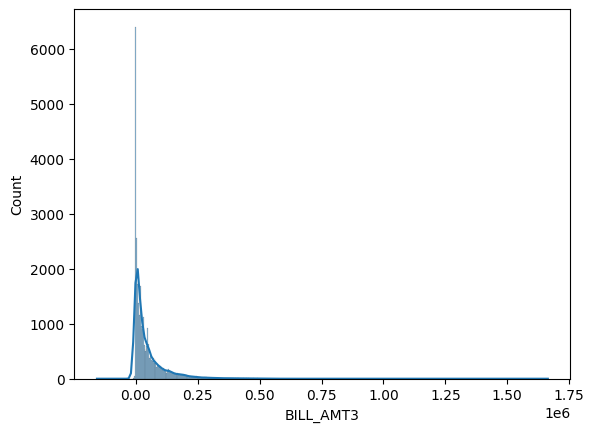

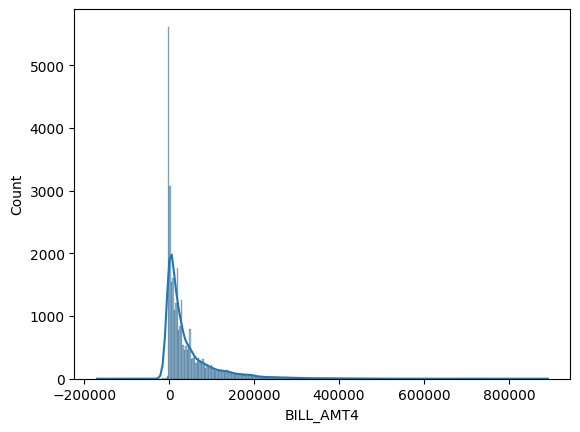

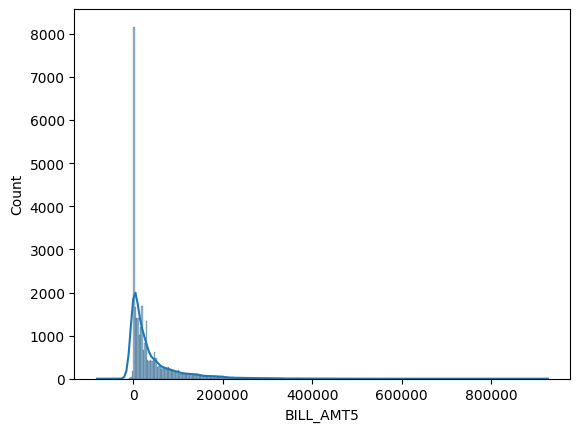

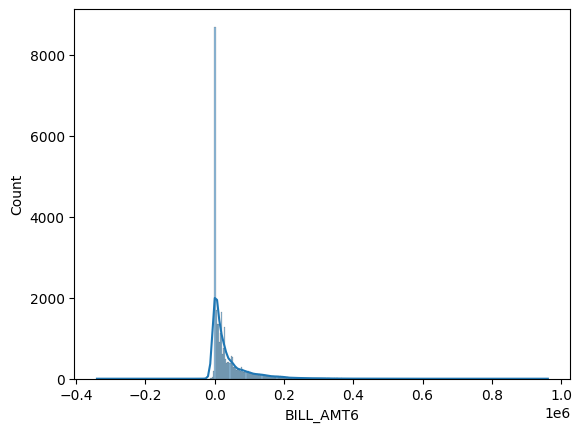

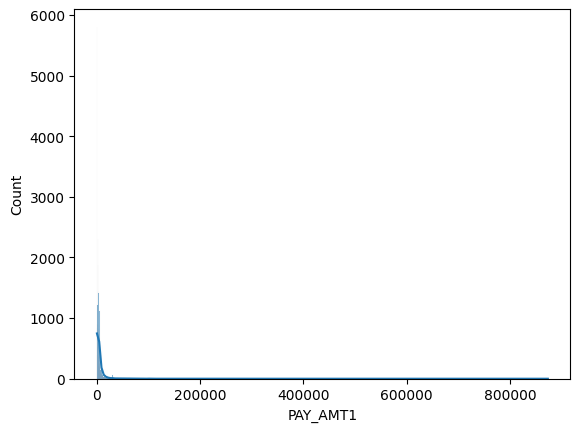

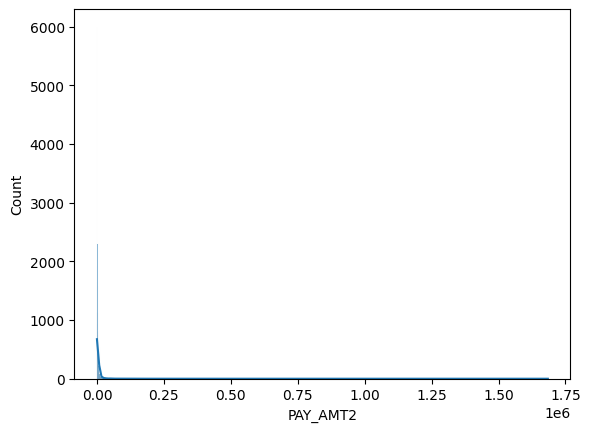

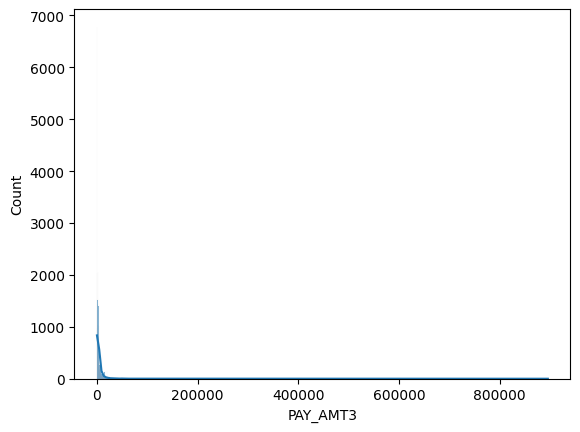

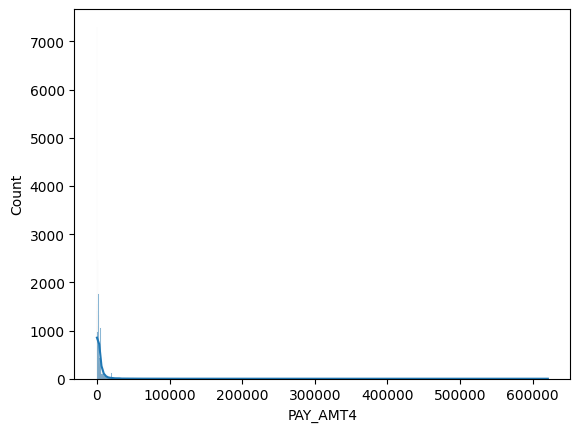

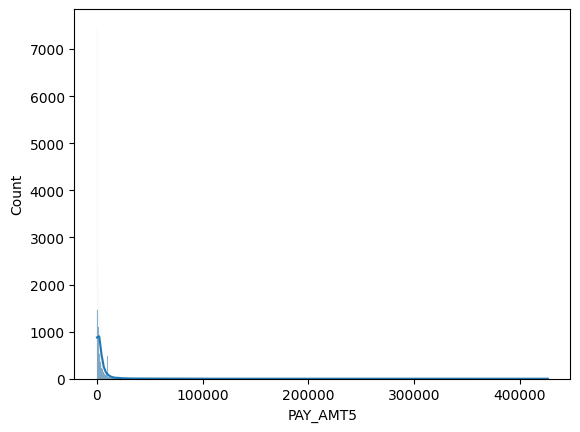

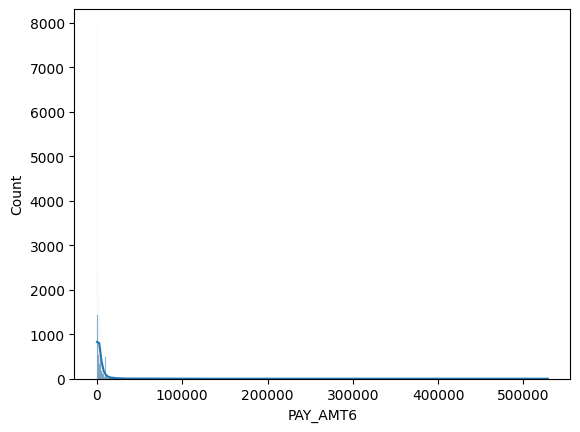

In [12]:
for i in numeric_features:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

numeric features preprocessing:
1. LIMIT_BAL: capping the outliers to 95% confidence limit --> lower capping limit 2.5%, upper capping limit 97.5%
2. BILL_AMT1-BILL_AMT6: capping the outliers to 95% confidence limit --> lower capping limit 2.5%, upper capping limit 97.5%
3. PAY_AMT1-PAY_AMT6: capping the outliers to 95% confidence limit --> lower capping limit 2.5%, upper capping limit 97.5%

Except AGE, all numeric features outliers will be capped at 95% confidence limit

<Axes: xlabel='default.payment.next.month', ylabel='count'>

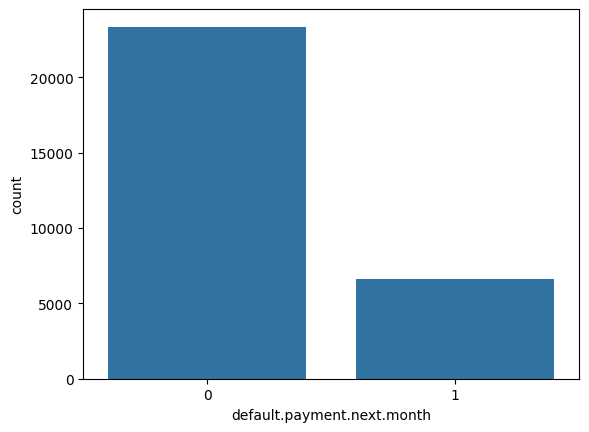

In [13]:
sns.countplot(data=df,x=target_feature[0])

<Figure size 1000x500 with 0 Axes>

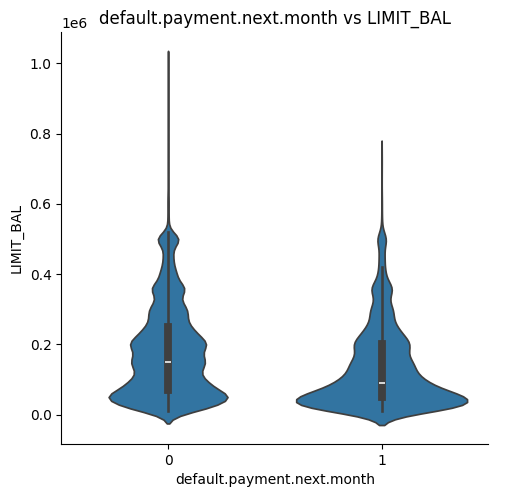

<Figure size 1000x500 with 0 Axes>

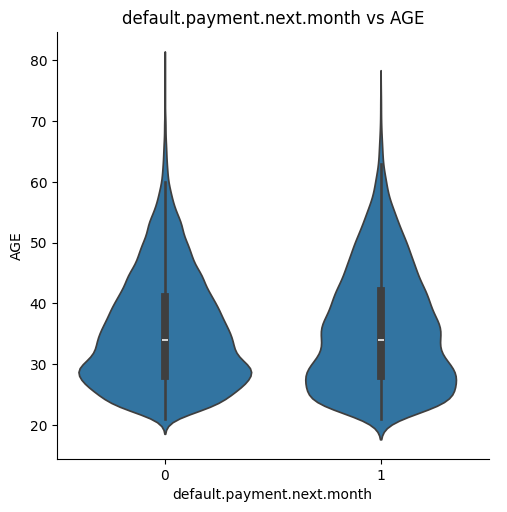

<Figure size 1000x500 with 0 Axes>

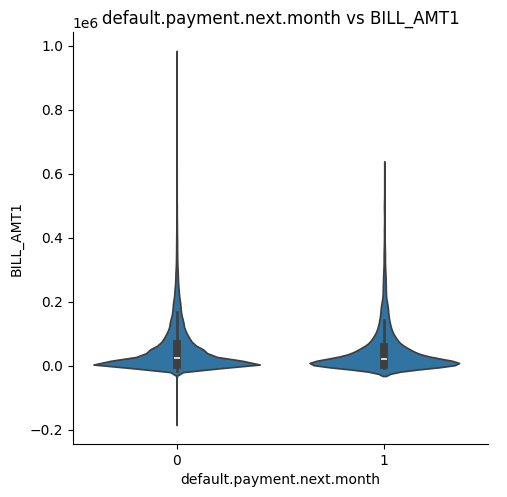

<Figure size 1000x500 with 0 Axes>

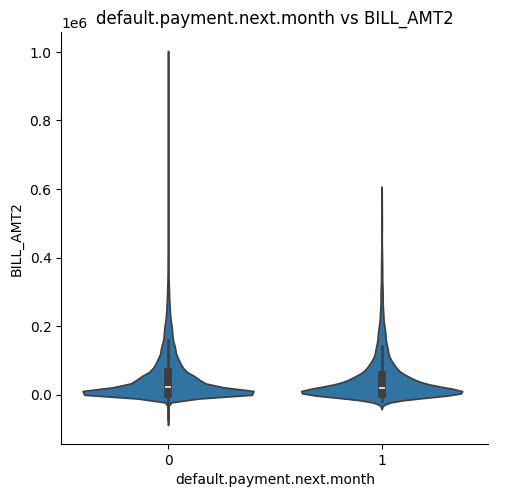

<Figure size 1000x500 with 0 Axes>

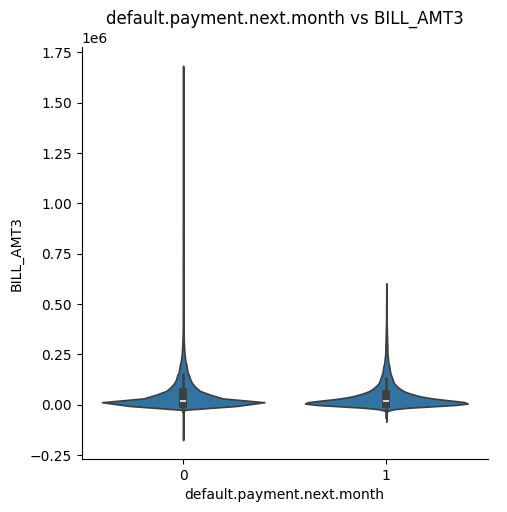

<Figure size 1000x500 with 0 Axes>

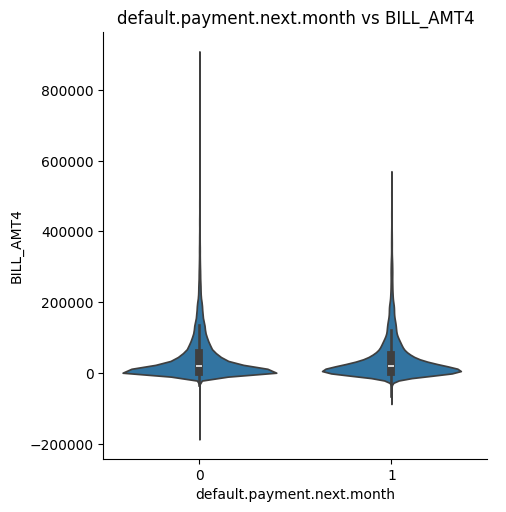

<Figure size 1000x500 with 0 Axes>

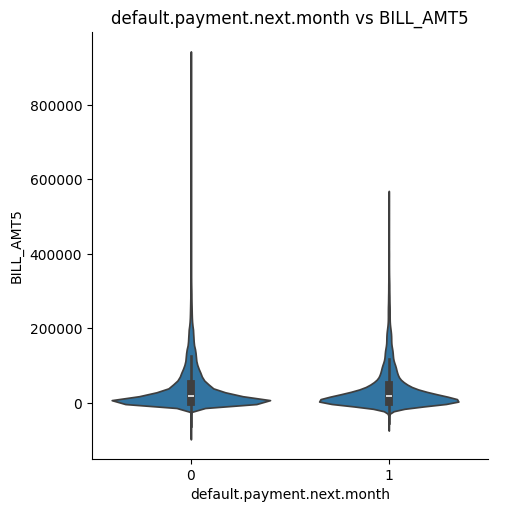

<Figure size 1000x500 with 0 Axes>

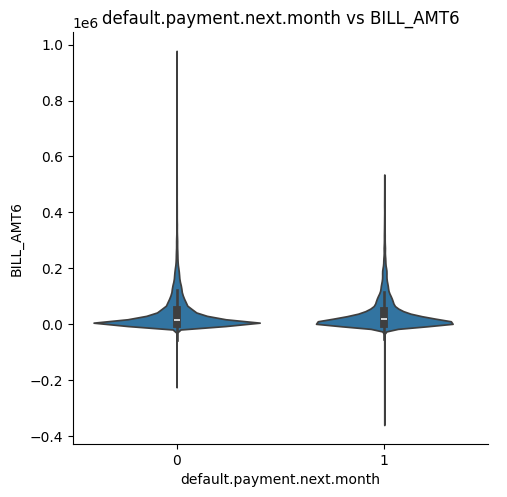

<Figure size 1000x500 with 0 Axes>

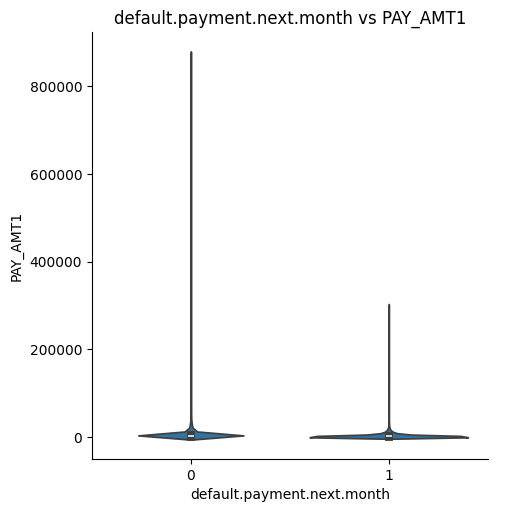

<Figure size 1000x500 with 0 Axes>

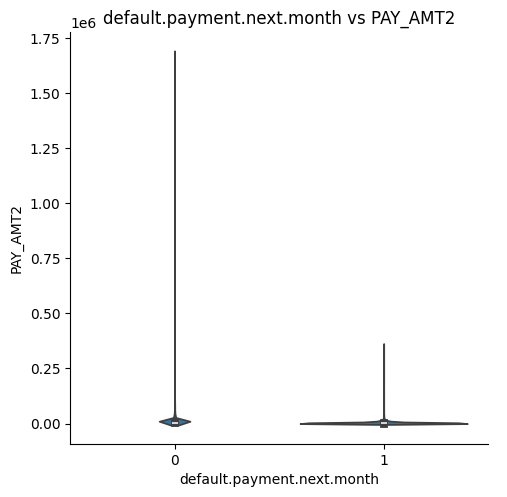

<Figure size 1000x500 with 0 Axes>

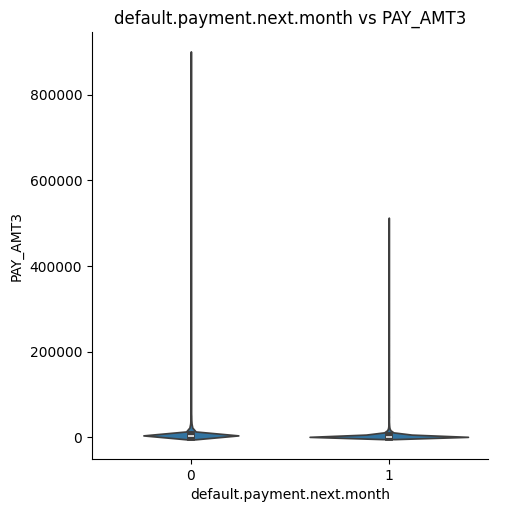

<Figure size 1000x500 with 0 Axes>

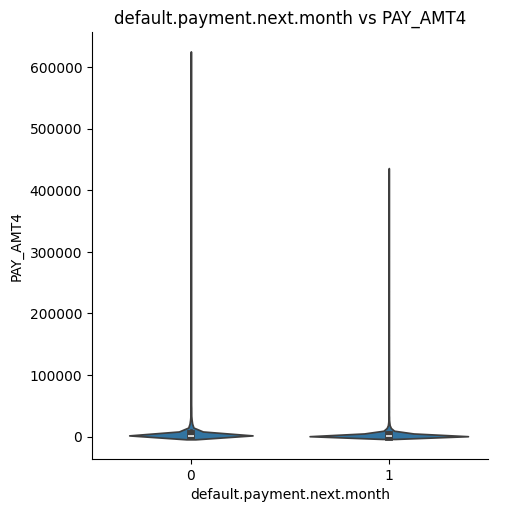

<Figure size 1000x500 with 0 Axes>

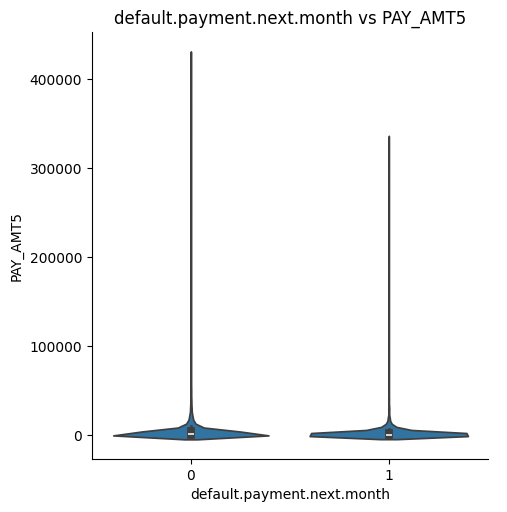

<Figure size 1000x500 with 0 Axes>

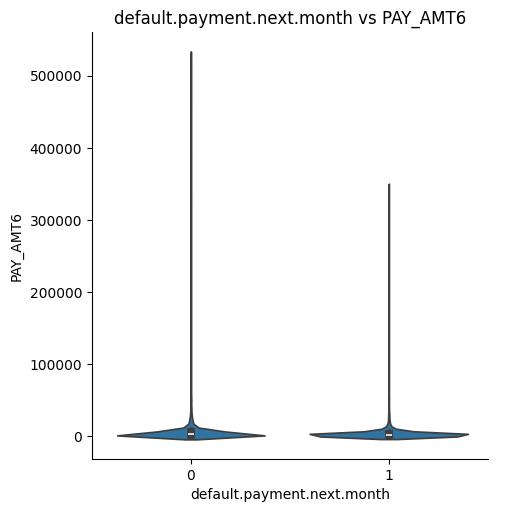

In [14]:
for i in numeric_features:
  plt.figure(figsize=(10,5))
  sns.catplot(x=target_feature[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(target_feature[0])
  plt.title(target_feature[0]+' vs '+i)
  plt.show()

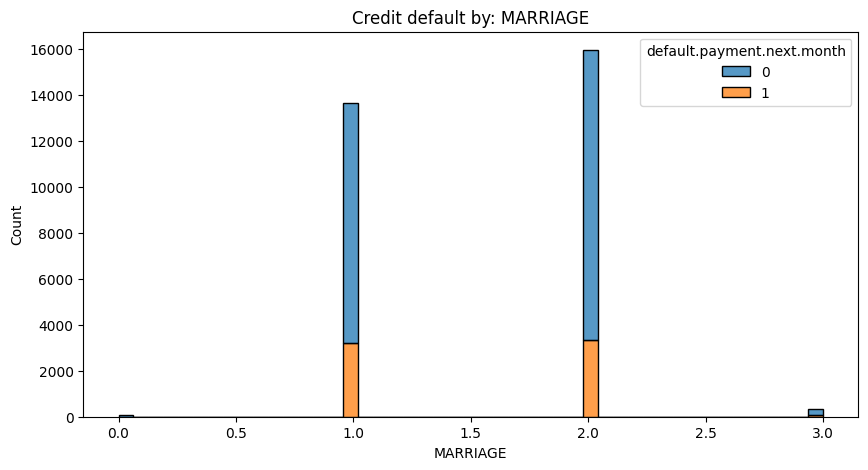

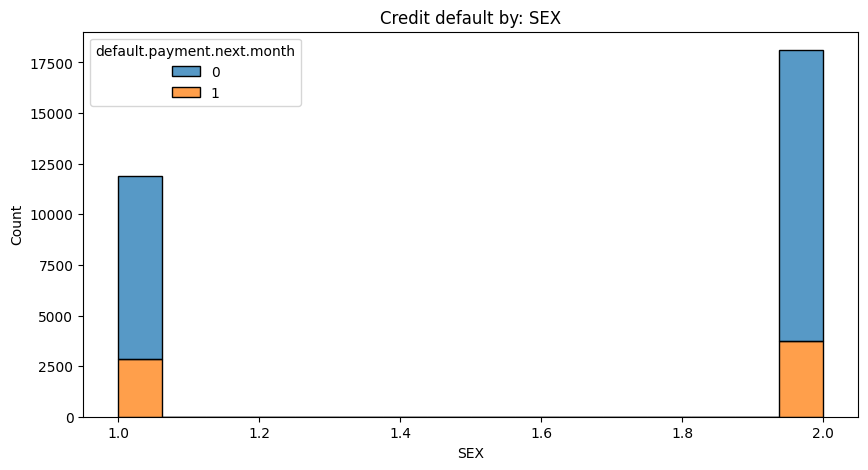

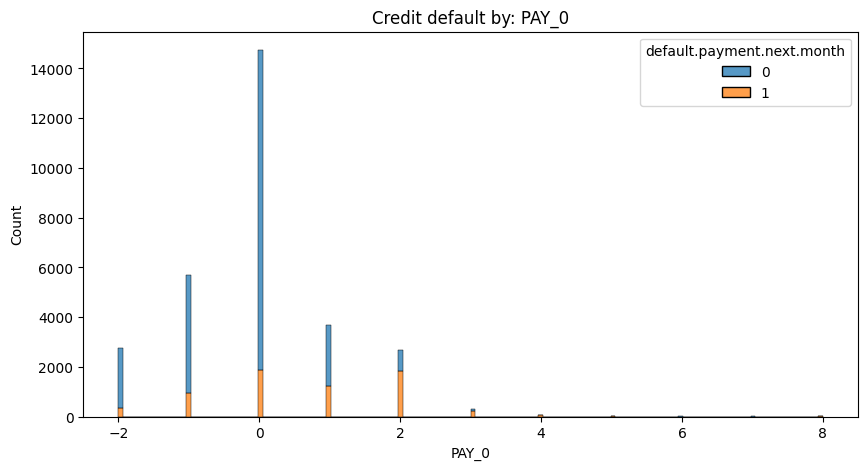

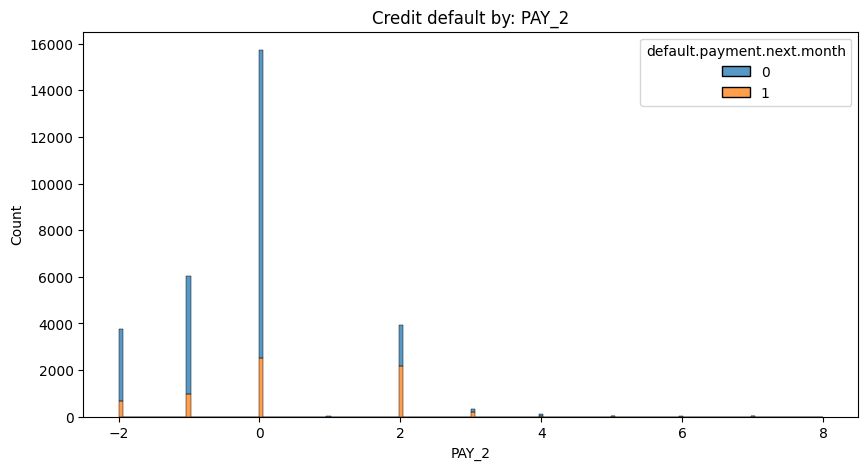

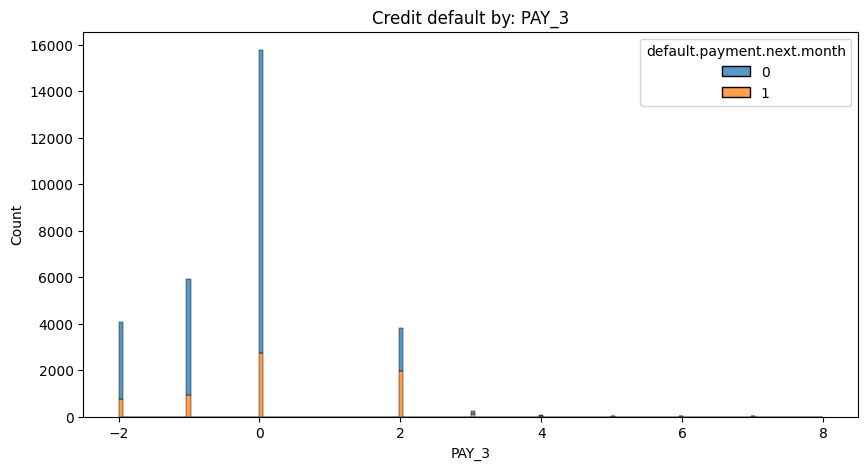

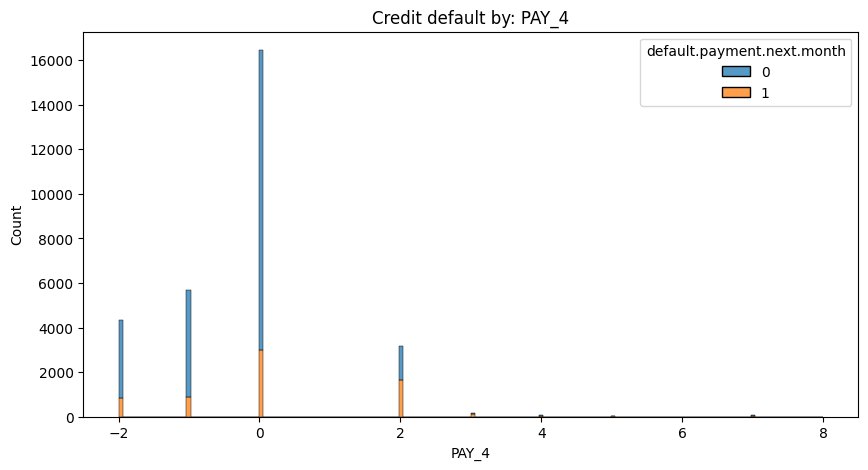

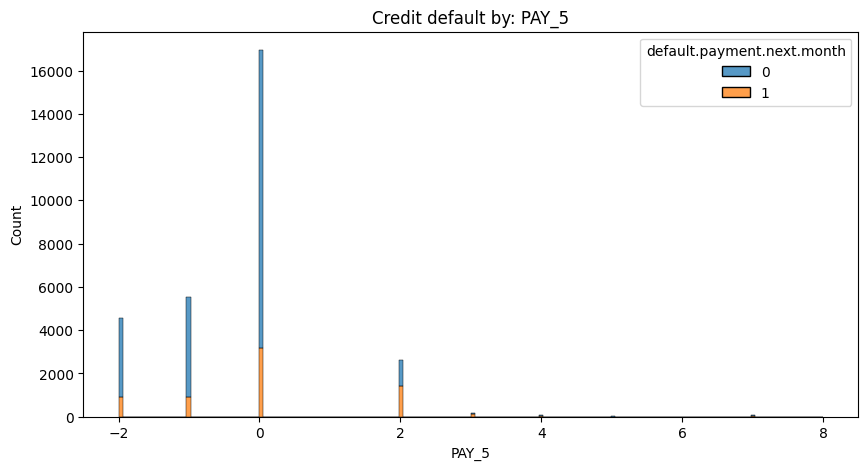

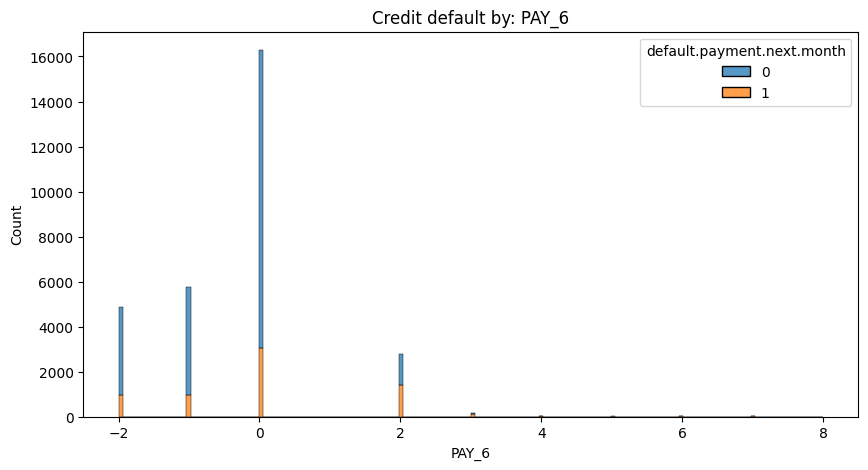

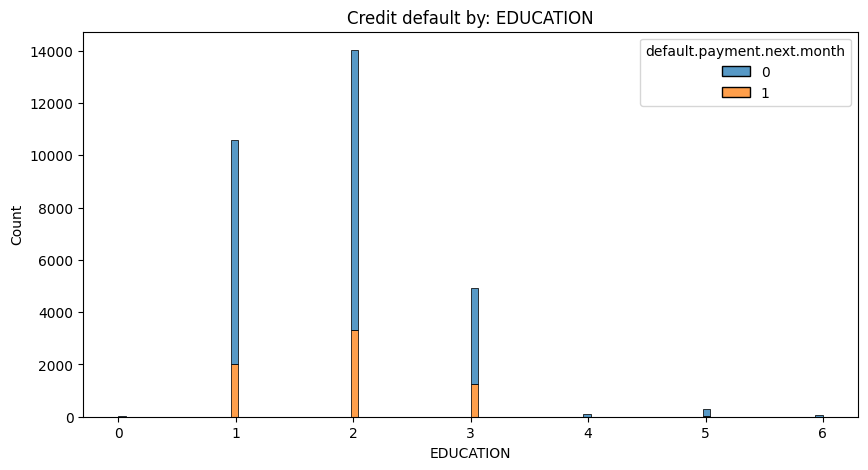

In [15]:
for i in categorical_features + ordinal_categorical_features:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=target_feature[0], data=df, stat="count", multiple="stack")
  plt.title('Credit default by: '+i)
  plt.show()

<Figure size 1000x500 with 0 Axes>

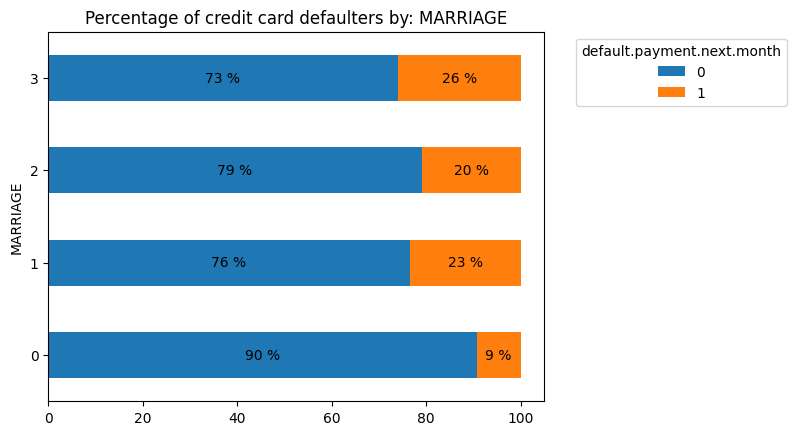

<Figure size 1000x500 with 0 Axes>

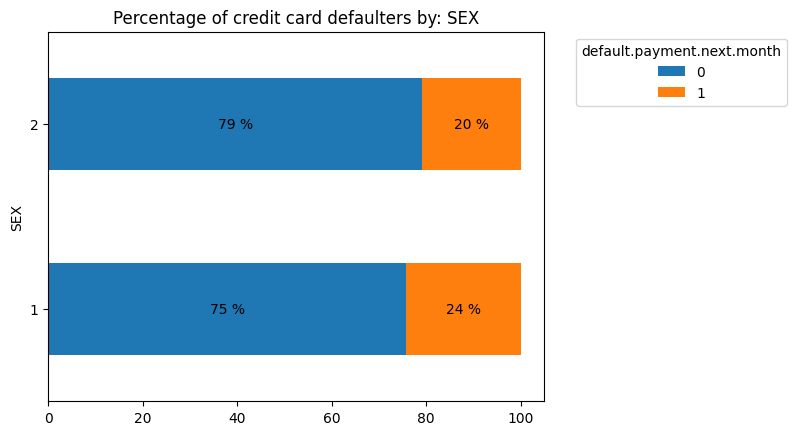

<Figure size 1000x500 with 0 Axes>

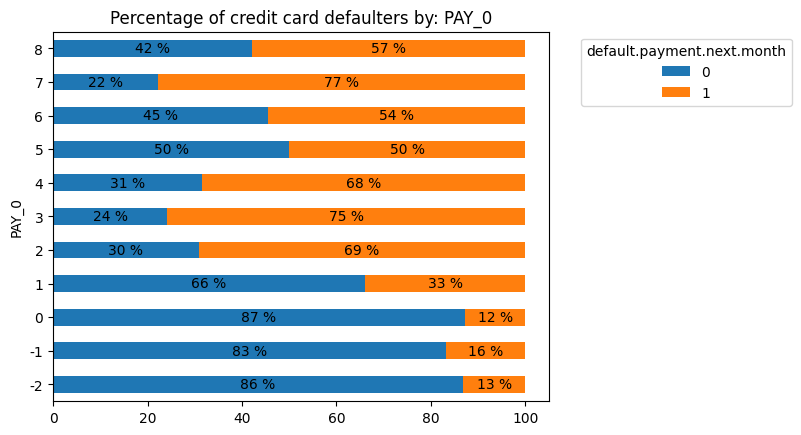

<Figure size 1000x500 with 0 Axes>

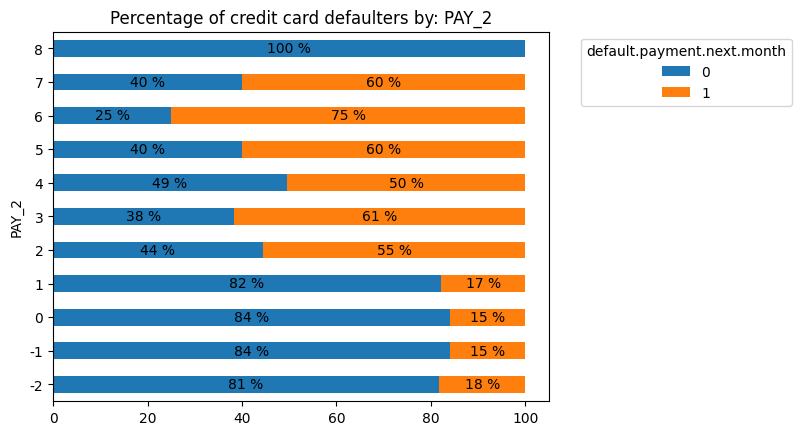

<Figure size 1000x500 with 0 Axes>

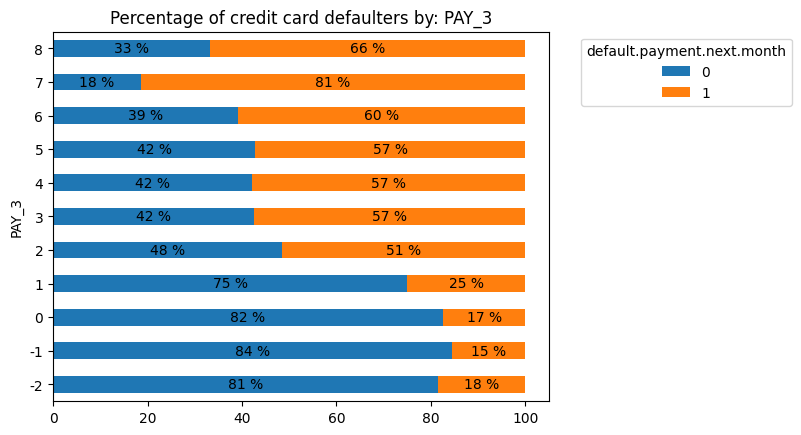

<Figure size 1000x500 with 0 Axes>

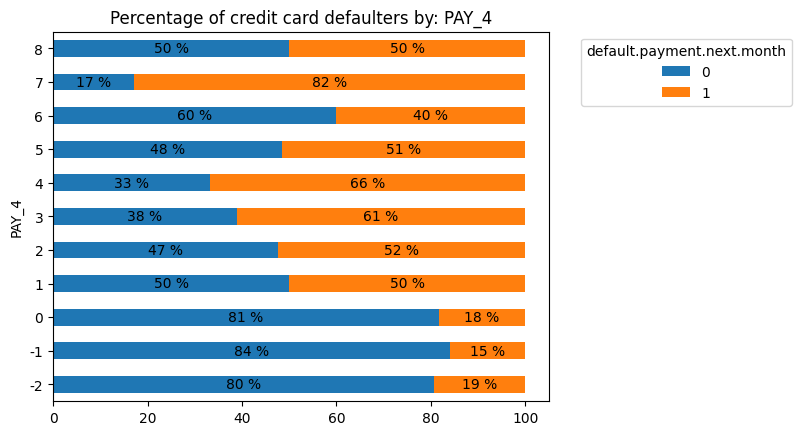

<Figure size 1000x500 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


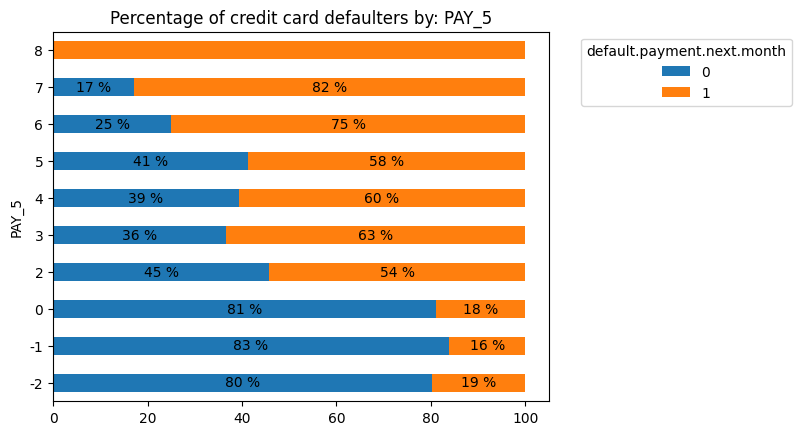

<Figure size 1000x500 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values


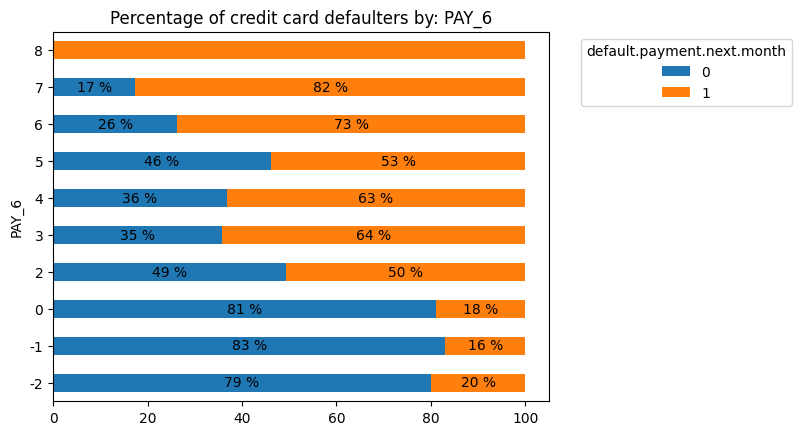

<Figure size 1000x500 with 0 Axes>

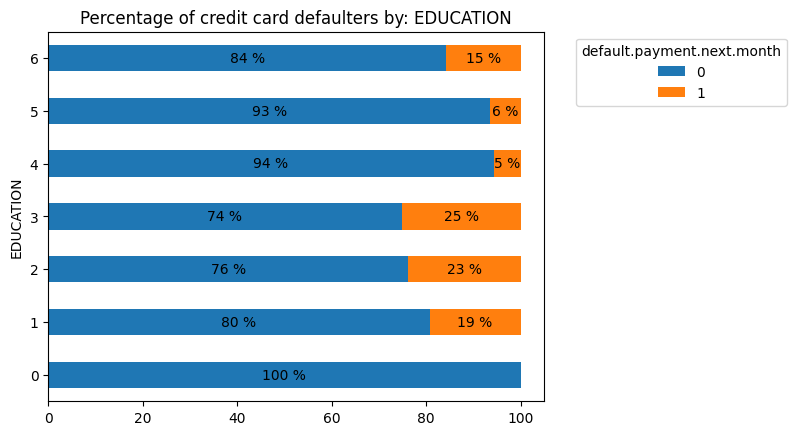

In [16]:
for i in categorical_features + ordinal_categorical_features:
    x_var, y_var = i, target_feature[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("Percentage of credit card defaulters by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

1. How does the probability of default payment vary by categories of different demographic variables? 
- Marriage category 'others' has 26% of people defaulting compared to 23% and 20% for 'married' and 'single' people
- Males have defaulted 24% of times compared to 20% for females
- Lower the education level, higher is the default 

2. Which variables are the strongest predictors of default payment?
- Education level
- Payment history --> whether a person has delayed payment in the past

<Axes: title={'center': 'Correlation Analysis'}>

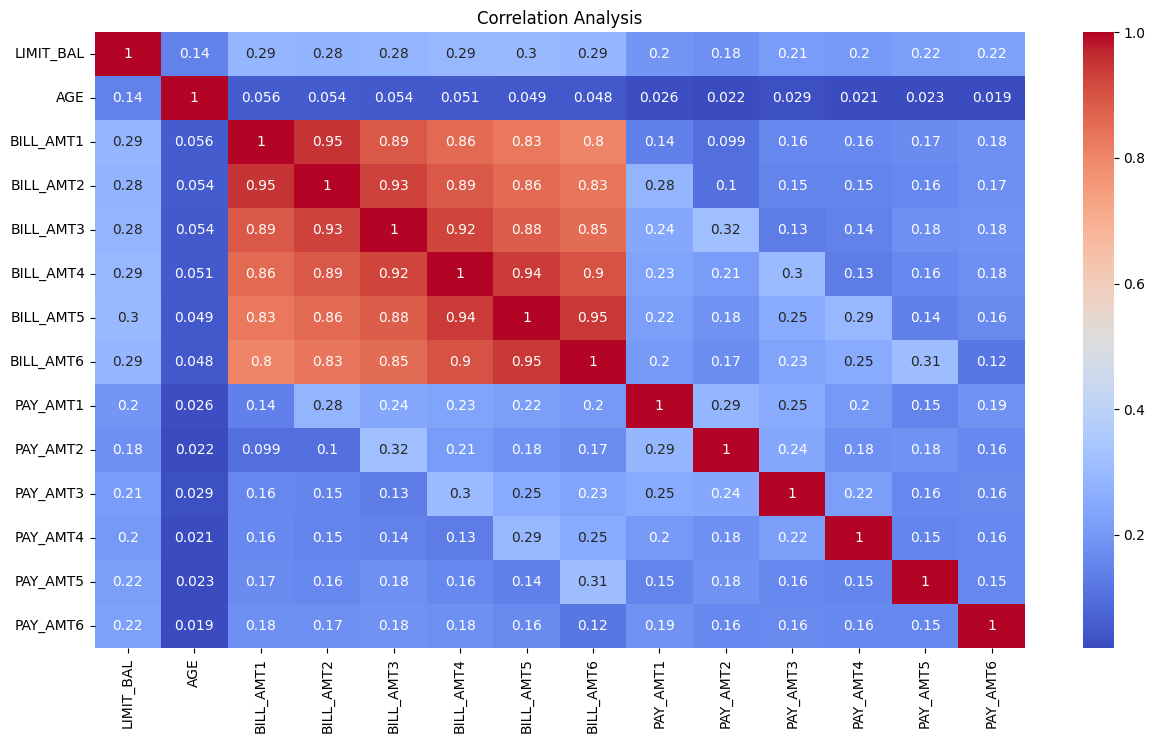

In [17]:
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[numeric_features].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [18]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
X = df[numeric_features]
calc_vif(X)

,variables,VIF
0,LIMIT_BAL,3.214685
1,AGE,2.741991
2,BILL_AMT1,20.646093
3,BILL_AMT2,38.058414
4,BILL_AMT3,31.712525
5,BILL_AMT4,29.402979
6,BILL_AMT5,35.826768
7,BILL_AMT6,21.286025
8,PAY_AMT1,1.888997
9,PAY_AMT2,2.369543


In [20]:
X2 = df[numeric_features].drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)
X2['BILL_AMT_AVG_6M'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1).values
calc_vif(X2)

,variables,VIF
0,LIMIT_BAL,3.195583
1,AGE,2.733685
2,PAY_AMT1,1.331980
3,PAY_AMT2,1.246693
4,PAY_AMT3,1.273808
5,PAY_AMT4,1.231998
6,PAY_AMT5,1.216560
7,PAY_AMT6,1.202922
8,BILL_AMT_AVG_6M,1.781760


numeric feature preprocessing:
1. BILL_AMT1-BILL_AMT6 will be dropped and a new feature BILL_AMT_AVG_6M indicating the average bill amount from past 6 months will be added

**Preprocessing**

categorical features preprocessing:

1. MARRIAGE: Marital status (1=married, 2=single, 3=others) --> Imputing marriage values 0 to 3
2. PAY_0-PAY_6: 
- values less than 0 --> credit card bill paid 
- 0 --> Use of revolving credit
- values greater than 0 --> credit card bill payment delay
3. EDUCATION: categories 0,4,5,6 --> 4

In [21]:
def cap_outliers(df, percentile_low=2.5, percentile_high=97.5, req_columns=[]):
    # Select numeric columns
    numeric_cols = df[req_columns]
    
    # Calculate percentiles
    low_perc = numeric_cols.quantile(percentile_low / 100)
    high_perc = numeric_cols.quantile(percentile_high / 100)
    
    # Cap outliers
    df[req_columns] = numeric_cols.clip(lower=low_perc, upper=high_perc, axis=1)
    
    return df, low_perc, high_perc

In [22]:
X=df.drop(columns=['default.payment.next.month'])
y=df['default.payment.next.month']


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X
                                               , y
                                               , test_size=0.30
                                               , shuffle=True
                                               , stratify=y 
                                               , random_state=42)

In [24]:
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [25]:
y_train.mean(), y_test.mean()

(0.2211904761904762, 0.2212222222222222)

In [26]:
req_columns = numeric_features.copy()
req_columns.remove('AGE')
X_train, low_perc, high_perc = cap_outliers(X_train
                                            , percentile_low=2.5
                                            , percentile_high=97.5
                                            , req_columns=req_columns)

# Apply the same cap to test sets
X_test[req_columns] = X_test[req_columns].clip(lower=low_perc, upper=high_perc, axis=1)

In [27]:
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,,,
8942,230000.0,1,2,2,30,0,0,0,0,0,0,101832.0,92396.0,84297.0,49681.0,46224.0,44800.0,5000.000,4000.0,2029.0,2000.0,2500.0,1300.0
17619,80000.0,2,1,1,32,-1,3,2,-1,0,0,4927.0,4693.0,3342.0,4844.0,3728.0,2612.0,0.000,0.0,4844.0,0.0,0.0,0.0
27896,100000.0,2,1,2,29,0,0,0,0,0,0,167410.0,85536.0,77303.0,60178.0,56436.0,51773.0,32005.825,3769.0,2008.0,1950.0,2001.0,18000.0
16104,20000.0,2,2,1,37,-1,4,3,2,2,2,3305.0,2870.0,2440.0,2510.0,2641.0,2222.0,0.000,0.0,500.0,400.0,0.0,36.0
4423,110000.0,2,2,1,34,0,0,0,0,0,0,24147.0,25750.0,27012.0,27762.0,32126.0,37779.0,2000.000,2000.0,1500.0,5000.0,6400.0,0.0


In [28]:
df[numeric_features].describe(percentiles=[0.025,0.975])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
2.5%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
97.5%,500000.000000,56.000000,262212.750000,253464.950000,2.435675e+05,226607.500000,210943.950000,205378.325000,32000.000000,3.300000e+04,30801.20000,30218.125000,30000.000000,35110.100000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [29]:
X_train[numeric_features].describe(percentiles=[0.025,0.975])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,166969.047619,35.428048,48954.851673,46935.605458,44849.463655,41230.210006,38327.434899,36936.830821,4477.076958,4435.482970,3964.831030,3726.689476,3665.898583,3862.516042
std,127360.119437,9.184785,63880.463166,61424.009126,59313.936796,55132.566417,51913.951468,50807.421989,6466.112637,6637.080568,6216.378387,6201.093800,6049.075818,7064.459182
min,20000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.5%,20000.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22225.500000,20993.000000,20012.000000,18984.000000,18100.000000,17032.000000,2118.500000,2015.000000,1821.500000,1500.000000,1508.500000,1500.000000
97.5%,500000.000000,56.000000,261021.300625,251120.048125,243167.083750,226036.150625,209987.329375,204302.006250,32005.020625,32921.141875,30455.143125,30525.000000,30004.001250,37015.054375
max,500000.000000,75.000000,261033.025000,251121.925000,243170.350000,226042.025000,210000.175000,204302.250000,32005.825000,32926.675000,30460.725000,30525.000000,30004.050000,37017.175000


In [30]:
X_test[numeric_features].describe(percentiles=[0.025,0.975])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,166983.075556,35.619556,49020.316197,47036.540325,44750.827317,41115.595531,38318.966106,37033.215222,4450.278794,4360.627839,3873.591386,3529.354667,3581.359772,3853.410256
std,127461.320003,9.293855,63899.146217,61688.039630,59085.245525,54909.369075,51744.013377,50687.904923,6495.004513,6602.253857,6169.920454,5920.105935,5909.165486,6926.147598
min,20000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.5%,20000.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22790.500000,21688.500000,20280.000000,19221.000000,18128.000000,17162.000000,2081.000000,2000.000000,1781.500000,1500.000000,1500.000000,1500.000000
97.5%,500000.000000,56.000000,261033.025000,251121.925000,243170.350000,226042.025000,210000.175000,204302.250000,31281.250000,32926.675000,30460.725000,30000.000000,30000.000000,31071.725000
max,500000.000000,79.000000,261033.025000,251121.925000,243170.350000,226042.025000,210000.175000,204302.250000,32005.825000,32926.675000,30460.725000,30525.000000,30004.050000,37017.175000


In [31]:
def preprocess_data(df):
    df['MARRIAGE'] = np.where(df['MARRIAGE']==0, 3,df['MARRIAGE'])
    for i in [0,2,3,4,5,6]:
        df['PAY_{}'.format(i)] = np.where(df['PAY_{}'.format(i)]<0, "bill_paid"
                                          ,(np.where(df['PAY_{}'.format(i)]>0,"bill_payment_delay"
                                                     ,"revolving_credit")))
    df['EDUCATION'] = np.where(df['EDUCATION'].isin([0,4,5,6]), 4, df['EDUCATION'])
    df['EDUCATION'] = df['EDUCATION'].map({1:'graduate_school',2:'university',3:'high_school',4:'others'})
    df['BILL_AMT_AVG_6M'] = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1).values
    
    df.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)
    return df

In [32]:
numeric_features=[x for x in numeric_features if x not in ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
numeric_features.append('BILL_AMT_AVG_6M')

In [33]:
numeric_features, categorical_features, ordinal_categorical_features

(['LIMIT_BAL',
  'AGE',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6',
  'BILL_AMT_AVG_6M'],
 ['MARRIAGE', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
 ['EDUCATION'])

In [34]:
edu_categories = ['others','high_school','university','graduate_school']

In [35]:
X_train=preprocess_data(X_train)
X_test=preprocess_data(X_test)

In [36]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_AVG_6M
ID,,,,,,,,,,,,,,,,,,
11019,160000.0,2,university,2,32,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,6000.0,6000.0,5600.0,6000.0,6000.0,5500.0,155590.666667
1711,100000.0,2,graduate_school,2,30,revolving_credit,revolving_credit,revolving_credit,revolving_credit,bill_payment_delay,revolving_credit,5000.0,10000.0,10000.0,0.0,2846.0,1936.0,43046.500000
4619,80000.0,1,graduate_school,2,29,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,3300.0,2500.0,1556.0,1600.0,1600.0,1600.0,57302.000000
5483,20000.0,2,university,1,27,revolving_credit,revolving_credit,bill_paid,bill_paid,bill_paid,bill_paid,1006.0,780.0,0.0,0.0,0.0,0.0,1704.333333
26188,50000.0,2,graduate_school,2,30,bill_paid,bill_paid,bill_paid,bill_paid,bill_paid,bill_paid,2070.0,0.0,0.0,0.0,0.0,0.0,345.000000


In [37]:
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT_AVG_6M
ID,,,,,,,,,,,,,,,,,,
8942,230000.0,1,university,2,30,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,5000.000,4000.0,2029.0,2000.0,2500.0,1300.0,69871.666667
17619,80000.0,2,graduate_school,1,32,bill_paid,bill_payment_delay,bill_payment_delay,bill_paid,revolving_credit,revolving_credit,0.000,0.0,4844.0,0.0,0.0,0.0,4024.333333
27896,100000.0,2,graduate_school,2,29,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,32005.825,3769.0,2008.0,1950.0,2001.0,18000.0,83106.000000
16104,20000.0,2,university,1,37,bill_paid,bill_payment_delay,bill_payment_delay,bill_payment_delay,bill_payment_delay,bill_payment_delay,0.000,0.0,500.0,400.0,0.0,36.0,2664.666667
4423,110000.0,2,university,1,34,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,revolving_credit,2000.000,2000.0,1500.0,5000.0,6400.0,0.0,29096.000000


In [38]:
numeric_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [39]:
ordinal_categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[edu_categories]))
    ]
)

In [40]:
categorical_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehotencoder",OneHotEncoder(sparse_output=False,drop='if_binary'))
    ]
)

In [41]:
preprocessor=ColumnTransformer(

    [
        ("numeric_pipeline",numeric_pipeline,numeric_features),
        ("catategorical_pipeline",categorical_pipeline,categorical_features),
        ("ordinal_catategorical_pipeline",ordinal_categorical_pipeline,ordinal_categorical_features)
    ]
)

In [42]:
preprocessor

ColumnTransformer(transformers=[('numeric_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'BILL_AMT_AVG_6M']),
                                ('catategorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['MARRIAGE', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6']),
                                ('ordinal_catategorical_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['others',
                                                                              'high_school',
                                                                              'university',
                                                                              'graduate_school']]))]),
                                 ['EDUCATION'])])

In [43]:
X_train1=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test1=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [44]:
X_train1.head()

,numeric_pipeline__LIMIT_BAL,numeric_pipeline__AGE,numeric_pipeline__PAY_AMT1,numeric_pipeline__PAY_AMT2,numeric_pipeline__PAY_AMT3,numeric_pipeline__PAY_AMT4,numeric_pipeline__PAY_AMT5,numeric_pipeline__PAY_AMT6,numeric_pipeline__BILL_AMT_AVG_6M,catategorical_pipeline__MARRIAGE_1,catategorical_pipeline__MARRIAGE_2,catategorical_pipeline__MARRIAGE_3,catategorical_pipeline__SEX_2,catategorical_pipeline__PAY_0_bill_paid,catategorical_pipeline__PAY_0_bill_payment_delay,catategorical_pipeline__PAY_0_revolving_credit,catategorical_pipeline__PAY_2_bill_paid,catategorical_pipeline__PAY_2_bill_payment_delay,catategorical_pipeline__PAY_2_revolving_credit,catategorical_pipeline__PAY_3_bill_paid,catategorical_pipeline__PAY_3_bill_payment_delay,catategorical_pipeline__PAY_3_revolving_credit,catategorical_pipeline__PAY_4_bill_paid,catategorical_pipeline__PAY_4_bill_payment_delay,catategorical_pipeline__PAY_4_revolving_credit,catategorical_pipeline__PAY_5_bill_paid,catategorical_pipeline__PAY_5_bill_payment_delay,catategorical_pipeline__PAY_5_revolving_credit,catategorical_pipeline__PAY_6_bill_paid,catategorical_pipeline__PAY_6_bill_payment_delay,catategorical_pipeline__PAY_6_revolving_credit,ordinal_catategorical_pipeline__EDUCATION
0,-0.054721,-0.373240,0.235529,0.235729,0.263048,0.366607,0.385870,0.231797,2.072319,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,-0.525837,-0.590997,0.080873,0.838418,0.970873,-0.600987,-0.135544,-0.272712,0.003201,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
2,-0.682876,-0.699875,-0.182042,-0.291624,-0.387507,-0.342962,-0.341531,-0.320275,0.265287,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
3,-1.153992,-0.917632,-0.536823,-0.550780,-0.637819,-0.600987,-0.606041,-0.546766,-0.756873,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
4,-0.918434,-0.590997,-0.372269,-0.668304,-0.637819,-0.600987,-0.606041,-0.546766,-0.781864,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0


# Model training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, f1_score

### Baseline models

In [47]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'LGBMClassifier': lgb.LGBMClassifier(),
    'CatBoostClassifier': CatBoostClassifier(),
    'XGBClassifier': XGBClassifier()
}

In [48]:
def evaluate_model(true, pred):
    roc_auc = roc_auc_score(true, pred)
    recall = recall_score(true, np.round_(pred))
    precision = precision_score(true, np.round_(pred))
    f1 = f1_score(true, np.round_(pred))
    
    return roc_auc, recall, precision, f1

In [49]:
result_df=pd.DataFrame()
roc_auc_list=[]
recall_list=[]
precision_list=[]
f1_list=[]
roc_auc_list2=[]
recall_list2=[]
precision_list2=[]
f1_list2=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train1,y_train)
    y_train_pred=model.predict_proba(X_train1)[:, 1]
    y_pred=model.predict_proba(X_test1)[:, 1]
    roc_auc_train, recall_train, precision_train, f1_train=evaluate_model(y_train,y_train_pred)
    roc_auc_test, recall_test, precision_test, f1_test=evaluate_model(y_test,y_pred)

    print("model:",model)
    print("TRAIN METRICS:")
    print("auc_score:",roc_auc_train)
    print("recall:",recall_train)
    print("precision:",precision_train)
    print("f1:",f1_train)
    
    print("TEST METRICS:")
    print("auc_score:",roc_auc_test)
    print("recall:",recall_test)
    print("precision:",precision_test)
    print("f1:",f1_test)
    
    roc_auc_list.append(roc_auc_train)
    recall_list.append(recall_train)
    precision_list.append(precision_train)
    f1_list.append(f1_train)
    
    roc_auc_list2.append(roc_auc_test)
    recall_list2.append(recall_test)
    precision_list2.append(precision_test)
    f1_list2.append(f1_test)
    
    print("="*40)
    print("\n")

model: LogisticRegression()
TRAIN METRICS:
auc_score: 0.7693616571764986
recall: 0.3595263724434876
precision: 0.6582577847851794
f1: 0.4650515176830966
TEST METRICS:
auc_score: 0.7589220331554772
recall: 0.33802109492717225
precision: 0.6331138287864534
f1: 0.4407334643091028


model: GaussianNB()
TRAIN METRICS:
auc_score: 0.746010262742126
recall: 0.5214208826695371
precision: 0.47649026165650205
f1: 0.4979440789473684
TEST METRICS:
auc_score: 0.7352216806131229
recall: 0.4982420894023104
precision: 0.45651173492867003
f1: 0.47646493756003844


model: KNeighborsClassifier()
TRAIN METRICS:
auc_score: 0.8829471702099443
recall: 0.4736275565123789
precision: 0.7296849087893864
f1: 0.5744125326370757
TEST METRICS:
auc_score: 0.7027503706757452
recall: 0.3425414364640884
precision: 0.5378548895899053
f1: 0.418533292420988


model: SVC(probability=True)
TRAIN METRICS:
auc_score: 0.809098510280019
recall: 0.35328310010764263
precision: 0.6789408357467935
f1: 0.4647408666100255
TEST METRICS:

In [50]:
result_df['model'] = models.keys()
result_df['train_roc_auc'] = roc_auc_list
result_df['test_roc_auc'] = roc_auc_list2
result_df['train_precision'] = precision_list
result_df['test_precision'] = precision_list2
result_df['train_recall'] = recall_list
result_df['test_recall'] = recall_list2
result_df['train_f1'] = f1_list
result_df['test_f1'] = f1_list2

In [51]:
result_df

,model,train_roc_auc,test_roc_auc,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.769362,0.758922,0.658258,0.633114,0.359526,0.338021,0.465052,0.440733
1,GaussianNB,0.746010,0.735222,0.476490,0.456512,0.521421,0.498242,0.497944,0.476465
2,KNeighborsClassifier,0.882947,0.702750,0.729685,0.537855,0.473628,0.342541,0.574413,0.418533
3,SVC,0.809099,0.719230,0.678941,0.640472,0.353283,0.327474,0.464741,0.433367
4,DecisionTreeClassifier,0.999999,0.599510,0.999784,0.369534,0.997847,0.386238,0.998815,0.377701
5,AdaBoostClassifier,0.781658,0.766101,0.643654,0.614018,0.335199,0.312406,0.440827,0.414115
6,GradientBoostingClassifier,0.804344,0.774630,0.663568,0.619208,0.399569,0.369161,0.498791,0.462555
7,RandomForestClassifier,0.999989,0.756874,0.999138,0.616952,0.998278,0.380211,0.998708,0.470479
8,LGBMClassifier,0.882368,0.771143,0.738451,0.617399,0.447363,0.367152,0.557179,0.460472
9,CatBoostClassifier,0.895040,0.768561,0.785591,0.614601,0.488267,0.363636,0.602230,0.456926


- Some baseline models are overfitting. The ROC-AUC score on the test set is between 0.70-0.78
- Next step would be to build models with better model parameters. Hyperparameter tuning can be done using gridsearchcv
- Among the baseline models GradientBoostingClassifier is the best performing model on the test set.

### Hyperparameter tuned models

In [52]:
hyperparameter_tuned_models = {
    'LogisticRegression': (LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }),
    'GaussianNB': (GaussianNB(), {
        'var_smoothing': np.logspace(0,-9, num=100)
    }),
    'KNeighborsClassifier': (KNeighborsClassifier(), {
        'n_neighbors': [5, 7, 9, 11, 13],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    # 'SVC': (SVC(probability=True), {
    #     'C': [0.001, 0.01, 0.1, 1, 10, 100],
    #     'gamma': ['scale', 'auto'],
    #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    # }),
    'DecisionTreeClassifier': (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'AdaBoostClassifier': (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200, 400],
        'algorithm': ['SAMME', 'SAMME.R']
    }),
    'GradientBoostingClassifier': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 3, 4, 5, 6]
    }),
    'RandomForestClassifier': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 3, 4, 5, 6],
    }),
    'LGBMClassifier': (lgb.LGBMClassifier(), {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [-1, 3, 4, 5, 6],
    }),
    'CatBoostClassifier': (CatBoostClassifier(), {
        'iterations': [50, 100, 200, 400],
        'depth': [None, 3, 4, 5, 6],
    }),
    'XGBClassifier': (XGBClassifier(), {
        'n_estimators': [50, 100, 200, 400],
        'max_depth': [None, 3, 4, 5, 6],
    })
}

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [54]:
hyperparameter_tuned_result_df = pd.DataFrame(columns=result_df.columns)
cv_method = StratifiedKFold(n_splits=3, shuffle=True, random_state=33)
result_rows = []

for model_name, (model, param_grid) in hyperparameter_tuned_models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_method, scoring='roc_auc')
    print('model: ', model_name)
    
    grid_search.fit(X_train1, y_train)

    best_params = grid_search.best_params_
    print('best_params:\n', best_params)

    best_model = grid_search.best_estimator_
    
    y_train_pred=best_model.predict_proba(X_train1)[:, 1]
    y_pred=best_model.predict_proba(X_test1)[:, 1]
    
    roc_auc_train, recall_train, precision_train, f1_train=evaluate_model(y_train,y_train_pred)
    roc_auc_test, recall_test, precision_test, f1_test=evaluate_model(y_test,y_pred)

    result_rows.append({'model': model_name
                        , 'train_roc_auc': roc_auc_train
                        , 'test_roc_auc': roc_auc_test
                        , 'train_precision': precision_train
                        , 'test_precision': precision_test
                        , 'train_recall': recall_train
                        , 'test_recall': recall_test
                        , 'train_f1': f1_train
                        , 'test_f1': f1_test
                        })
    print('train_roc_auc: ', roc_auc_train)
    print('test_roc_auc: ', roc_auc_test)
    print('=='*30)

model:  LogisticRegression
best_params:
 {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
train_roc_auc:  0.770103170406077
test_roc_auc:  0.7601033370383591
model:  GaussianNB
best_params:
 {'var_smoothing': 0.012328467394420659}
train_roc_auc:  0.7469362525952206
test_roc_auc:  0.7371095095571677
model:  KNeighborsClassifier
best_params:
 {'algorithm': 'kd_tree', 'n_neighbors': 13, 'weights': 'uniform'}
train_roc_auc:  0.8267636163315353
test_roc_auc:  0.7371426161628025
model:  DecisionTreeClassifier
best_params:
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
train_roc_auc:  0.7669406688717336
test_roc_auc:  0.741587822903164
model:  AdaBoostClassifier
best_params:
 {'algorithm': 'SAMME', 'n_estimators': 400}
train_roc_auc:  0.7812824314136133
test_roc_auc:  0.7664255879951721
model:  GradientBoostingClassifier
best_params:
 {'max_depth': 3, 'n_estimators': 100}
train_roc_auc:  0.8043441286393558
test_roc_auc:  0.77463

In [55]:
hyperparameter_tuned_result_df = pd.DataFrame(result_rows)

In [56]:
hyperparameter_tuned_result_df

,model,train_roc_auc,test_roc_auc,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogisticRegression,0.770103,0.760103,0.650135,0.627832,0.310441,0.292315,0.420224,0.398903
1,GaussianNB,0.746936,0.737110,0.490788,0.475756,0.521851,0.497740,0.505843,0.486500
2,KNeighborsClassifier,0.826764,0.737143,0.682239,0.607143,0.380409,0.324460,0.488459,0.422913
3,DecisionTreeClassifier,0.766941,0.741588,0.658974,0.629565,0.387298,0.363636,0.487864,0.461000
4,AdaBoostClassifier,0.781282,0.766426,0.646645,0.618719,0.336060,0.315419,0.442272,0.417831
5,GradientBoostingClassifier,0.804344,0.774630,0.663568,0.619208,0.399569,0.369161,0.498791,0.462555
6,RandomForestClassifier,0.790184,0.765358,0.669699,0.631086,0.364478,0.338523,0.472048,0.440667
7,LGBMClassifier,0.804590,0.775125,0.663752,0.625539,0.392250,0.364139,0.493099,0.460317
8,CatBoostClassifier,0.810615,0.775638,0.676235,0.621528,0.400646,0.359618,0.503177,0.455616
9,XGBClassifier,0.809352,0.773019,0.668956,0.624786,0.398493,0.367152,0.499460,0.462512


In [59]:
hyperparameter_tuned_result_df[hyperparameter_tuned_result_df.test_roc_auc>0.77].sort_values(by='test_roc_auc',ascending=False)

,model,train_roc_auc,test_roc_auc,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
8,CatBoostClassifier,0.810615,0.775638,0.676235,0.621528,0.400646,0.359618,0.503177,0.455616
7,LGBMClassifier,0.804590,0.775125,0.663752,0.625539,0.392250,0.364139,0.493099,0.460317
5,GradientBoostingClassifier,0.804344,0.774630,0.663568,0.619208,0.399569,0.369161,0.498791,0.462555
9,XGBClassifier,0.809352,0.773019,0.668956,0.624786,0.398493,0.367152,0.499460,0.462512


- The CatBoostClassifier has the highest test_roc_auc at 77.56%. It's test_f1 score stands at 45.56%.
- Hence, CatBoostClassifier model can be put to production.